In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import plot_tree

In [55]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
df.shape

(150, 5)

In [58]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

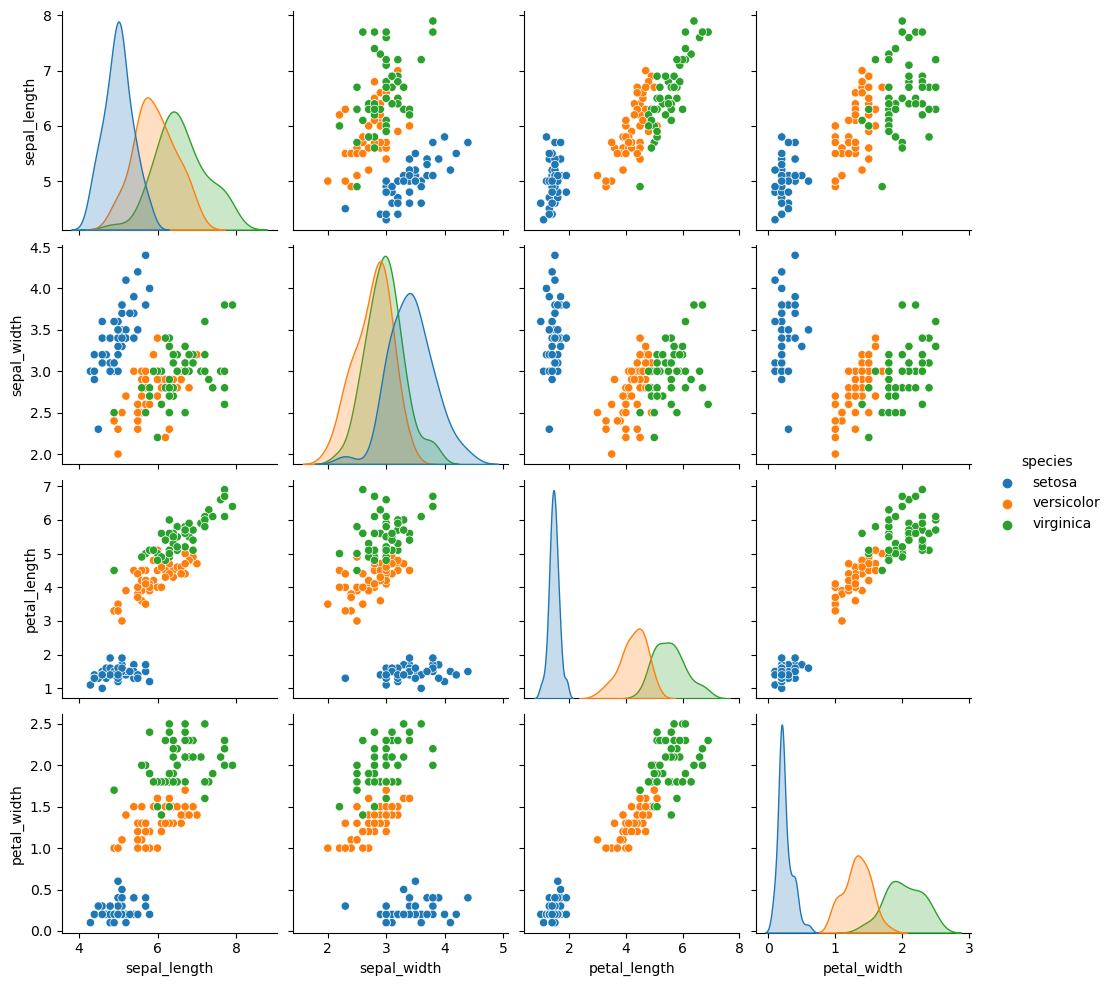

In [59]:
sns.pairplot(data=df ,hue='species')

C:\Users\sies\AppData\Local\Temp\ipykernel_12856\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

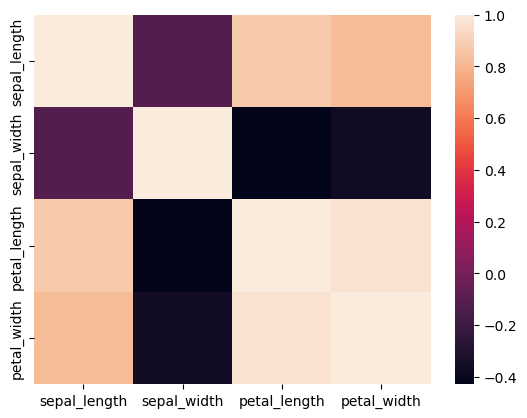

In [60]:
sns.heatmap(df.corr())

In [61]:
target=df['species']
df1=df.copy()
df1=df.drop('species' ,axis =1)

In [62]:
x=df1

In [63]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [65]:
le=LabelEncoder()
target= le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
y=target

In [67]:
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("Training split input-",x_train.shape)
print()
print("Testing split input-", x_test.shape)

Training split input- (120, 4)

Testing split input- (30, 4)


In [68]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

print('Decision Tree Classifier Crteated')

Decision Tree Classifier Crteated


In [69]:
y_pred= dtree.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score :1.0')

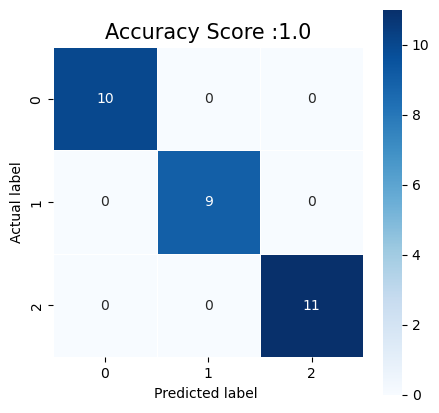

In [70]:
cm=confusion_matrix(y_test , y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm ,linewidth=.5 ,annot=True ,square=True , cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label ')
all_sample_title='Accuracy Score :{0}' .format(dtree.score(x_test , y_test))
plt.title(all_sample_title , size=15)

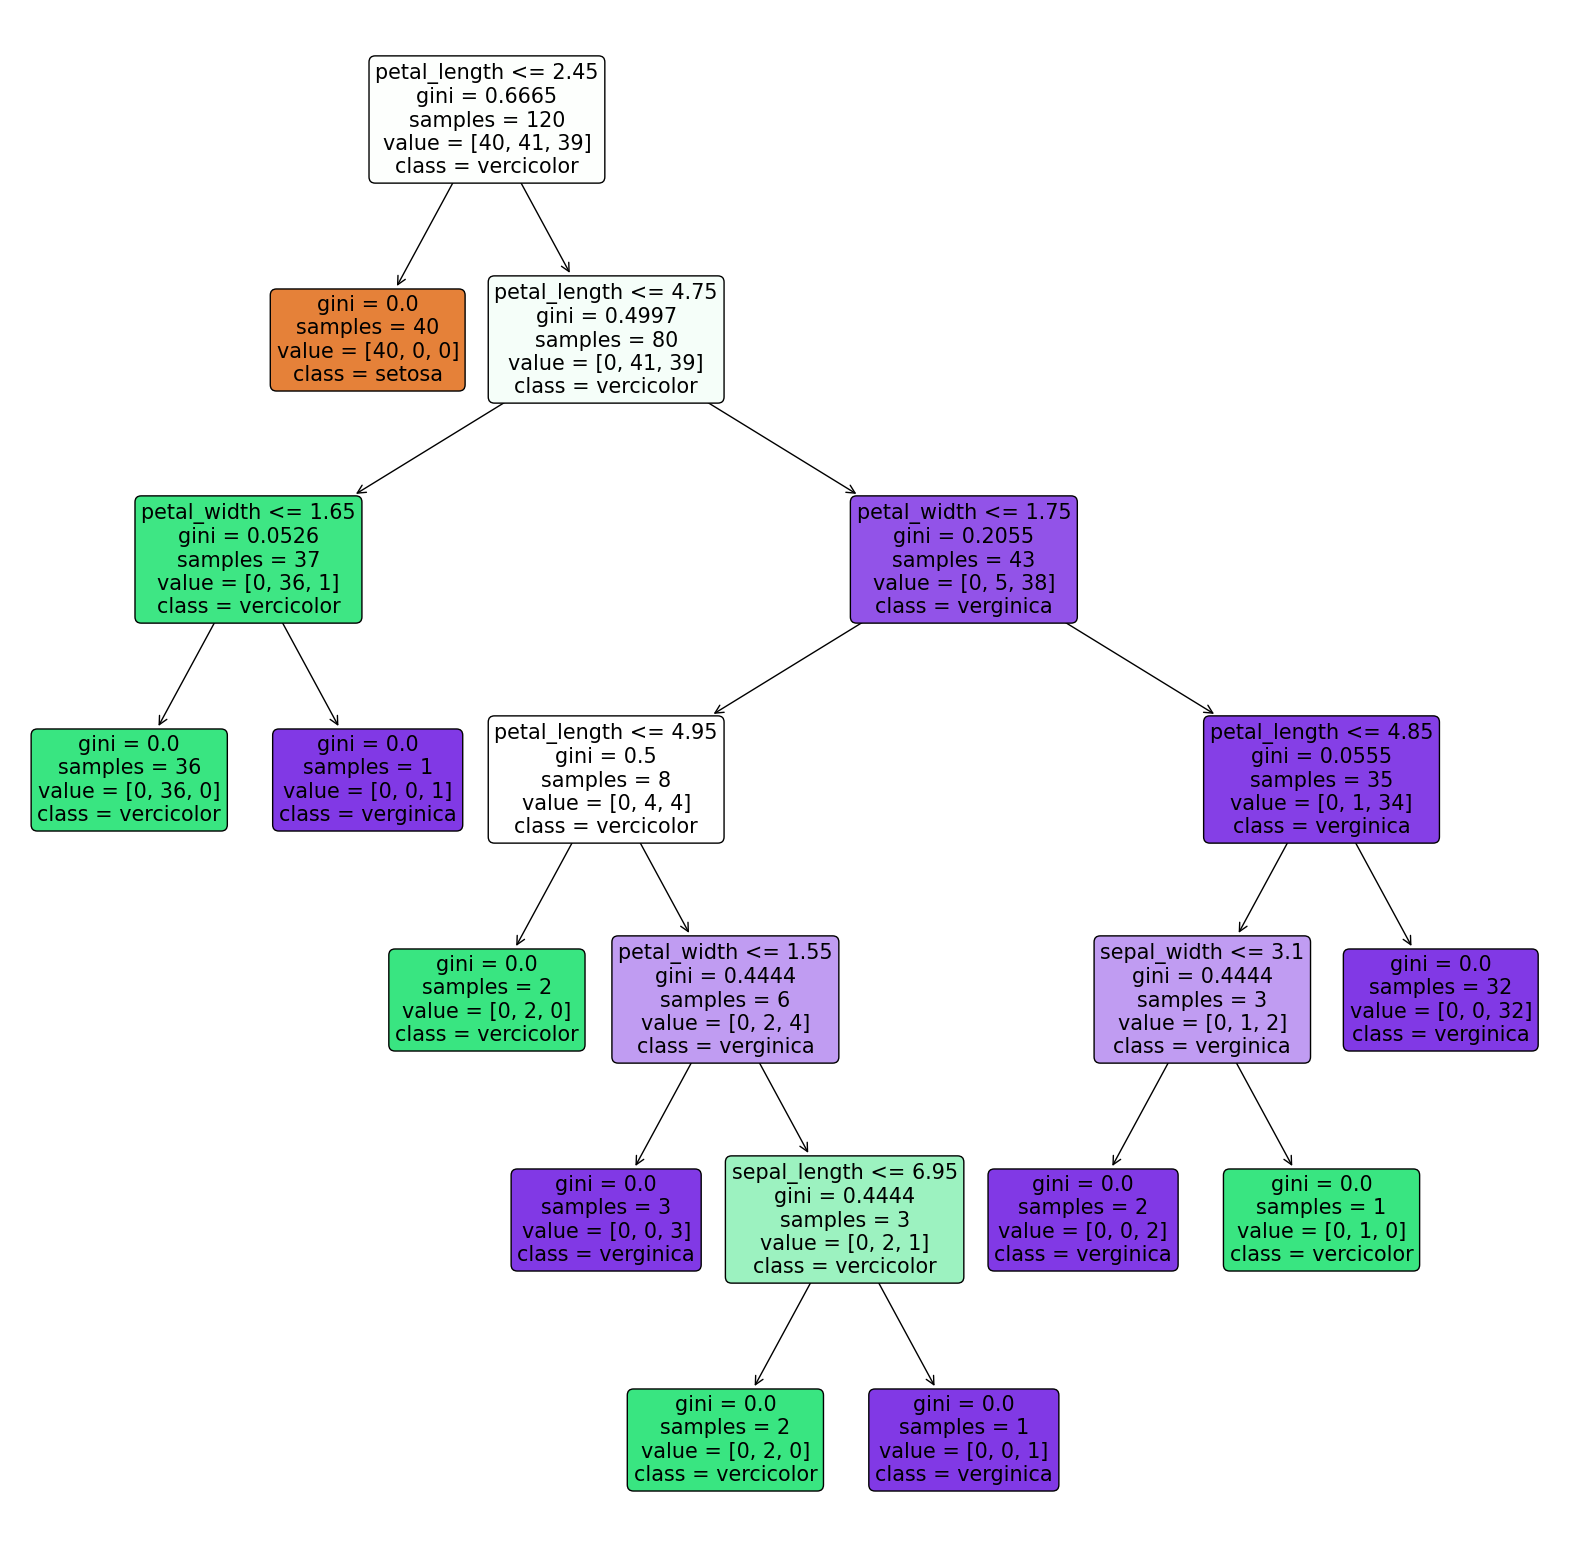

In [71]:
plt.figure(figsize=(20,20))
dec_tree=plot_tree(decision_tree=dtree , feature_names=df1.columns , class_names=['setosa','vercicolor','verginica'] , filled =True , precision=4,rounded=True)